In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.3630 - val_loss: 0.2709
Epoch 2/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2634 - val_loss: 0.2523
Epoch 3/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.2418 - val_loss: 0.2290
Epoch 4/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2210 - val_loss: 0.2107
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2056 - val_loss: 0.1979
Epoch 6/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1947 - val_loss: 0.1886
Epoch 7/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1865 - val_loss: 0.1815
Epoch 8/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1799 - val_loss: 0.1754
Epoch 9/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1743 - val_loss: 0.1702
Epoch

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

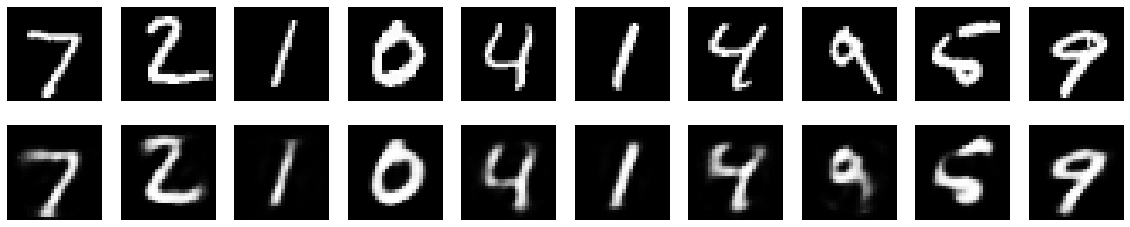

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# SPARSE AUTOENCODER

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
from keras.regularizers import l1
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu', activity_regularizer=l1(10e-6))(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_regularized = autoencoder_regularized.fit(x_train, x_train, epochs=20)

encoded_regularized = Model(input_img, code)

Epoch 1/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.1835
Epoch 2/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.1292
Epoch 3/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.1190
Epoch 4/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.1150
Epoch 5/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.1125
Epoch 6/20
60000/60000 [==============================] - 14s 242us/step - loss: 0.1108
Epoch 7/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.1095
Epoch 8/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.1085
Epoch 9/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.1076
Epoch 10/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.1070
Epoch 11/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1064
Epoch 12/20
60000/60000 [=====

In [0]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()


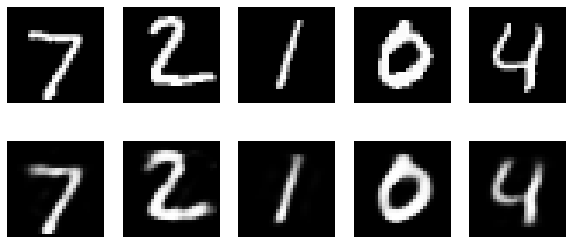

In [19]:
plot_autoencoder_outputs(autoencoder_regularized, 5, (28, 28))